In [1]:
import numpy as np
import pandas as pd

## Load data


In [2]:
df_us_confirmed_case = pd.read_csv('RAW_us_confirmed_cases.csv')
df_us_confirmed_case

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10083,10219,10228,10239,10252,10258,10271,10284,10304,10314
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37325,37350,37372,37398,37414,37425,37445,37461,37495,37529
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3595,3596,3596,3599,3601,3601,3605,3607,3609,3611
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4262,4275,4276,4278,4279,4281,4283,4286,4290,4295
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10338,10364,10371,10395,10406,10408,10423,10441,10490,10510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5168,5185,5204,5204,5204,5218,5221,5234,5241,5243
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3814,3817,3829,3829,3829,3843,3853,3871,3880,3901
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1715,1719,1731,1731,1731,1745,1756,1764,1771,1781


In [3]:
df_us_mask_mandate = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
df_us_mask_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


In [4]:
df_mask_use_by_county = pd.read_csv('mask-use-by-county.csv')
df_mask_use_by_county

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


### collect data needed and clean up

In [5]:
state = 'Florida'
state_abbr = 'FL'
county = 'Palm Beach'
FIPS = 12099


In [6]:
# clean up data
# drop unneed columns
df_us_confirmed_case_dropped = df_us_confirmed_case.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df_us_confirmed_case_dropped=df_us_confirmed_case_dropped.fillna(0)
df_us_confirmed_case_dropped['FIPS'] =  df_us_confirmed_case_dropped.FIPS.apply(lambda x:  "{:05d}".format(int(float(x))))
df_us_confirmed_case_dropped

,Province_State,Admin2,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21
0,Alabama,Autauga,01001,0,0,0,0,0,0,0,...,10083,10219,10228,10239,10252,10258,10271,10284,10304,10314
1,Alabama,Baldwin,01003,0,0,0,0,0,0,0,...,37325,37350,37372,37398,37414,37425,37445,37461,37495,37529
2,Alabama,Barbour,01005,0,0,0,0,0,0,0,...,3595,3596,3596,3599,3601,3601,3605,3607,3609,3611
3,Alabama,Bibb,01007,0,0,0,0,0,0,0,...,4262,4275,4276,4278,4279,4281,4283,4286,4290,4295
4,Alabama,Blount,01009,0,0,0,0,0,0,0,...,10338,10364,10371,10395,10406,10408,10423,10441,10490,10510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,56039,0,0,0,0,0,0,0,...,5168,5185,5204,5204,5204,5218,5221,5234,5241,5243
3338,Wyoming,Uinta,56041,0,0,0,0,0,0,0,...,3814,3817,3829,3829,3829,3843,3853,3871,3880,3901
3339,Wyoming,Unassigned,90056,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,56043,0,0,0,0,0,0,0,...,1715,1719,1731,1731,1731,1745,1756,1764,1771,1781


In [7]:
# Melt the confirm case data so each row repreasent confirmed case each day

id_vars = [
    'Province_State',
    'Admin2',
    'FIPS',
]

df_us_confirmed_case_transformed =pd.melt(df_us_confirmed_case_dropped, id_vars = id_vars, var_name ='date', value_name = "cases")
df_us_confirmed_case_transformed['date'] = pd.to_datetime(df_us_confirmed_case_transformed['date'])
df_us_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases
0,Alabama,Autauga,01001,2020-01-22,0
1,Alabama,Baldwin,01003,2020-01-22,0
2,Alabama,Barbour,01005,2020-01-22,0
3,Alabama,Bibb,01007,2020-01-22,0
4,Alabama,Blount,01009,2020-01-22,0
...,...,...,...,...,...
2185663,Wyoming,Teton,56039,2021-11-05,5243
2185664,Wyoming,Uinta,56041,2021-11-05,3901
2185665,Wyoming,Unassigned,90056,2021-11-05,0
2185666,Wyoming,Washakie,56043,2021-11-05,1781


In [8]:

df_palm_beach_confirmed_case_transformed = df_us_confirmed_case_transformed[(df_us_confirmed_case_transformed['Admin2'] == county) & (df_us_confirmed_case_transformed['Province_State'] == state)].reset_index(drop=True)
df_palm_beach_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases
0,Florida,Palm Beach,12099,2020-01-22,0
1,Florida,Palm Beach,12099,2020-01-23,0
2,Florida,Palm Beach,12099,2020-01-24,0
3,Florida,Palm Beach,12099,2020-01-25,0
4,Florida,Palm Beach,12099,2020-01-26,0
...,...,...,...,...,...
649,Florida,Palm Beach,12099,2021-11-01,227675
650,Florida,Palm Beach,12099,2021-11-02,227675
651,Florida,Palm Beach,12099,2021-11-03,227675
652,Florida,Palm Beach,12099,2021-11-04,227675


In [9]:
# create FIPS column for easier join
df_us_mask_mandate['FIPS_State'] =  df_us_mask_mandate.FIPS_State.apply(lambda x:  "{:02d}".format(int(x)))
df_us_mask_mandate['FIPS_County'] =  df_us_mask_mandate.FIPS_County.apply(lambda x:  "{:03d}".format(int(x)))
df_us_mask_mandate['FIPS'] = df_us_mask_mandate['FIPS_State'] +  df_us_mask_mandate['FIPS_County'] 
df_us_mask_mandate


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,FIPS
0,AL,Autauga County,01,001,4/10/2020,2,NaN,NaN,NaN,NaN,01001
1,AL,Autauga County,01,001,4/11/2020,2,NaN,NaN,NaN,NaN,01001
2,AL,Autauga County,01,001,4/12/2020,2,NaN,NaN,NaN,NaN,01001
3,AL,Autauga County,01,001,4/13/2020,2,NaN,NaN,NaN,NaN,01001
4,AL,Autauga County,01,001,4/14/2020,2,NaN,NaN,NaN,NaN,01001
...,...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,030,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,...",78030
1593865,VI,St. Thomas Island,78,030,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,...",78030
1593866,VI,St. Thomas Island,78,030,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,...",78030
1593867,VI,St. Thomas Island,78,030,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,...",78030


In [10]:
# drop unneed columns
df_us_mask_mandate_dropped = df_us_mask_mandate.drop(columns=['FIPS_State', 'FIPS_County', 'order_code', 'Source_of_Action', 'URL', 'Citation'])
df_us_mask_mandate_dropped

,State_Tribe_Territory,County_Name,date,Face_Masks_Required_in_Public,FIPS
0,AL,Autauga County,4/10/2020,NaN,01001
1,AL,Autauga County,4/11/2020,NaN,01001
2,AL,Autauga County,4/12/2020,NaN,01001
3,AL,Autauga County,4/13/2020,NaN,01001
4,AL,Autauga County,4/14/2020,NaN,01001
...,...,...,...,...,...
1593864,VI,St. Thomas Island,8/11/2021,Yes,78030
1593865,VI,St. Thomas Island,8/12/2021,Yes,78030
1593866,VI,St. Thomas Island,8/13/2021,Yes,78030
1593867,VI,St. Thomas Island,8/14/2021,Yes,78030


In [11]:

df_palm_beach_mask_mandate = df_us_mask_mandate_dropped[df_us_mask_mandate['County_Name'] == 'Palm Beach County'].reset_index(drop =True)
df_palm_beach_mask_mandate

,State_Tribe_Territory,County_Name,date,Face_Masks_Required_in_Public,FIPS
0,FL,Palm Beach County,4/10/2020,NaN,12099
1,FL,Palm Beach County,4/11/2020,NaN,12099
2,FL,Palm Beach County,4/12/2020,NaN,12099
3,FL,Palm Beach County,4/13/2020,NaN,12099
4,FL,Palm Beach County,4/14/2020,NaN,12099
...,...,...,...,...,...
488,FL,Palm Beach County,8/11/2021,NaN,12099
489,FL,Palm Beach County,8/12/2021,NaN,12099
490,FL,Palm Beach County,8/13/2021,NaN,12099
491,FL,Palm Beach County,8/14/2021,NaN,12099


In [12]:
df_palm_beach_mask_mandate.Face_Masks_Required_in_Public.unique()

array([nan], dtype=object)

In [13]:
df_mask_use_palm_beach = df_mask_use_by_county[df_mask_use_by_county['COUNTYFP'] == FIPS].reset_index(drop =True)
df_mask_use_palm_beach

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,12099,0.03,0.02,0.05,0.116,0.784


### Palm Beach has no mask mandate

In [14]:
df_mask_use_palm_beach_transformed = df_mask_use_palm_beach.drop(columns=['COUNTYFP'])
df_mask_use_palm_beach_transformed =pd.melt(df_mask_use_palm_beach_transformed, var_name ='Response', value_name = "Proportion")
df_mask_use_palm_beach_transformed

,Response,Proportion
0,NEVER,0.030
1,RARELY,0.020
2,SOMETIMES,0.050
3,FREQUENTLY,0.116
4,ALWAYS,0.784


### Visualize


In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

from datetime import datetime
from matplotlib.dates import date2num


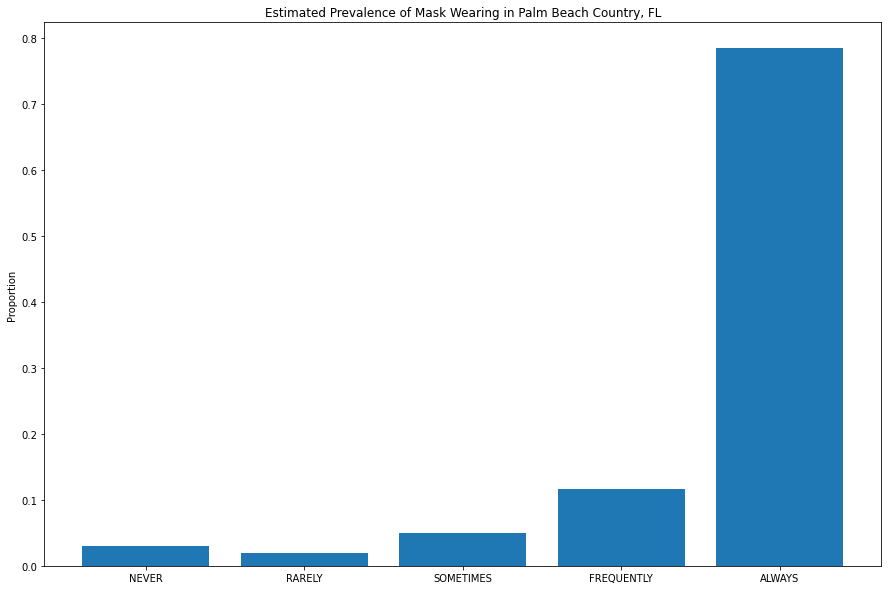

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(df_mask_use_palm_beach_transformed['Response'], df_mask_use_palm_beach_transformed['Proportion'], color  ='C0')

ax.set_title("Estimated Prevalence of Mask Wearing in Palm Beach Country, FL")
ax.set_ylabel("Proportion")

plt.show()

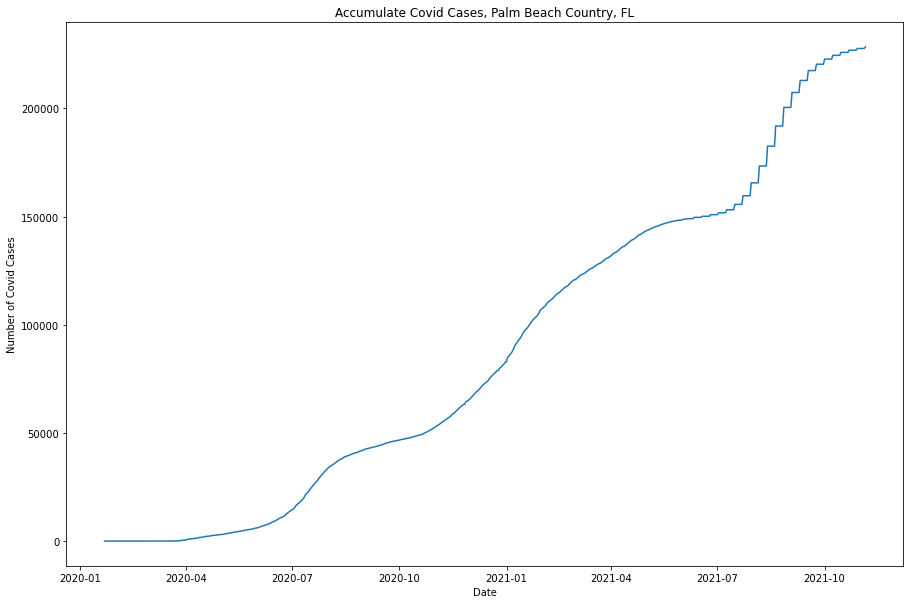

In [17]:
# accumulated covid cases
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['cases'], color='C0')

ax.set_title("Accumulate Covid Cases, Palm Beach Country, FL")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Covid Cases")

plt.show()

In [18]:
# daily new covid cases
df_palm_beach_confirmed_case_transformed['new_cases'] = df_palm_beach_confirmed_case_transformed['cases'].diff()
df_palm_beach_confirmed_case_transformed['new_cases_moving_average_7_days'] = df_palm_beach_confirmed_case_transformed['new_cases'].rolling(window=7).mean().round()
df_palm_beach_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases,new_cases,new_cases_moving_average_7_days
0,Florida,Palm Beach,12099,2020-01-22,0,NaN,NaN
1,Florida,Palm Beach,12099,2020-01-23,0,0.0,NaN
2,Florida,Palm Beach,12099,2020-01-24,0,0.0,NaN
3,Florida,Palm Beach,12099,2020-01-25,0,0.0,NaN
4,Florida,Palm Beach,12099,2020-01-26,0,0.0,NaN
...,...,...,...,...,...,...,...
649,Florida,Palm Beach,12099,2021-11-01,227675,0.0,115.0
650,Florida,Palm Beach,12099,2021-11-02,227675,0.0,115.0
651,Florida,Palm Beach,12099,2021-11-03,227675,0.0,115.0
652,Florida,Palm Beach,12099,2021-11-04,227675,0.0,115.0


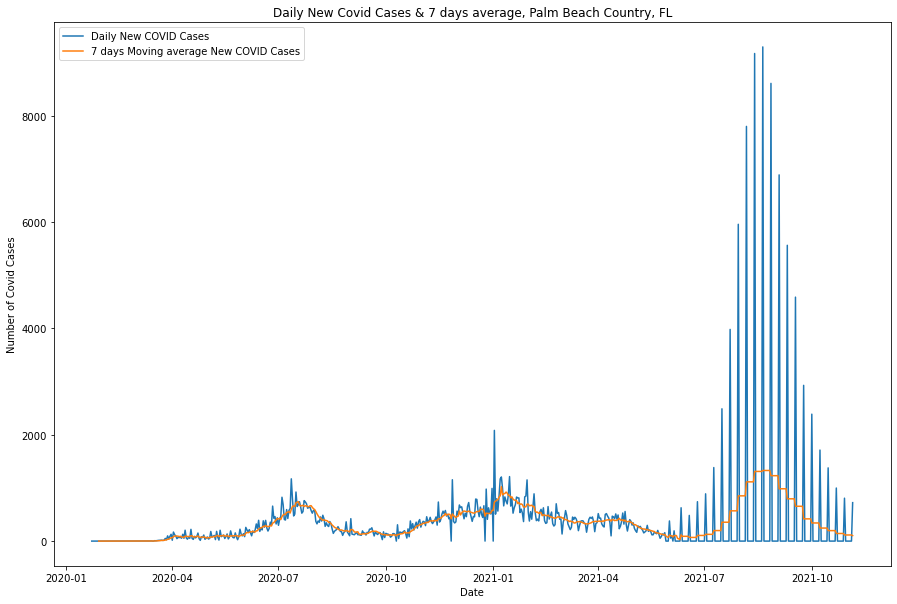

In [19]:
# daily new covid cases
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['new_cases'], color='C0')
ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['new_cases_moving_average_7_days'], color='C1')


line0 = lines.Line2D([0], [0], label='Daily New COVID Cases', color='C0')
line1 = lines.Line2D([0], [0], label='7 days Moving average New COVID Cases', color='C1')
plt.legend(handles=[line0,line1])

ax.set_title("Daily New Covid Cases & 7 days average, Palm Beach Country, FL")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Covid Cases")

plt.show()

In [20]:
# infection rate = daily new case / population
population = 1492191
df_palm_beach_confirmed_case_transformed['daily_infection_rate'] = df_palm_beach_confirmed_case_transformed['new_cases'].apply(lambda x: x * 1.0 / population)
df_palm_beach_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days'] = df_palm_beach_confirmed_case_transformed['new_cases_moving_average_7_days'].apply(lambda x: x * 1.0 / population)

df_palm_beach_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases,new_cases,new_cases_moving_average_7_days,daily_infection_rate,daily_infection_rate_new_cases_moving_average_7_days
0,Florida,Palm Beach,12099,2020-01-22,0,NaN,NaN,NaN,NaN
1,Florida,Palm Beach,12099,2020-01-23,0,0.0,NaN,0.000000,NaN
2,Florida,Palm Beach,12099,2020-01-24,0,0.0,NaN,0.000000,NaN
3,Florida,Palm Beach,12099,2020-01-25,0,0.0,NaN,0.000000,NaN
4,Florida,Palm Beach,12099,2020-01-26,0,0.0,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
649,Florida,Palm Beach,12099,2021-11-01,227675,0.0,115.0,0.000000,0.000077
650,Florida,Palm Beach,12099,2021-11-02,227675,0.0,115.0,0.000000,0.000077
651,Florida,Palm Beach,12099,2021-11-03,227675,0.0,115.0,0.000000,0.000077
652,Florida,Palm Beach,12099,2021-11-04,227675,0.0,115.0,0.000000,0.000077


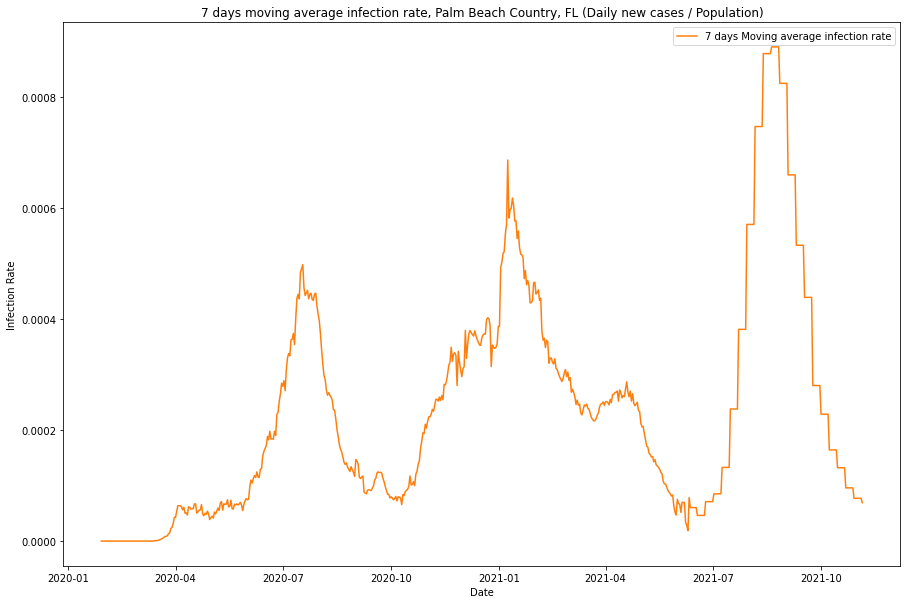

In [21]:
# daily new covid cases
fig, ax = plt.subplots(figsize=(15,10))
#ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['daily_infection_rate'], color='C0')
ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days'], color='C1')



#line0 = lines.Line2D([0], [0], label='Daily Infection rate', color='C0')
line1 = lines.Line2D([0], [0], label='7 days Moving average infection rate', color='C1')

plt.legend(handles=[
    #line0,
    line1])

ax.set_title("7 days moving average infection rate, Palm Beach Country, FL (Daily new cases / Population)")
ax.set_xlabel("Date")
ax.set_ylabel("Infection Rate")

plt.show()

### since Palm Beach county doesn't have mandate mask policy, try to find 

In [22]:
# 

df_palm_beach_confirmed_case_transformed['daily_infection_rate_diff'] =df_palm_beach_confirmed_case_transformed['daily_infection_rate'].diff()
df_palm_beach_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days_diff'] =df_palm_beach_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days'].diff()

df_palm_beach_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases,new_cases,new_cases_moving_average_7_days,daily_infection_rate,daily_infection_rate_new_cases_moving_average_7_days,daily_infection_rate_diff,daily_infection_rate_new_cases_moving_average_7_days_diff
0,Florida,Palm Beach,12099,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Florida,Palm Beach,12099,2020-01-23,0,0.0,NaN,0.000000,NaN,NaN,NaN
2,Florida,Palm Beach,12099,2020-01-24,0,0.0,NaN,0.000000,NaN,0.000000,NaN
3,Florida,Palm Beach,12099,2020-01-25,0,0.0,NaN,0.000000,NaN,0.000000,NaN
4,Florida,Palm Beach,12099,2020-01-26,0,0.0,NaN,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
649,Florida,Palm Beach,12099,2021-11-01,227675,0.0,115.0,0.000000,0.000077,0.000000,0.000000
650,Florida,Palm Beach,12099,2021-11-02,227675,0.0,115.0,0.000000,0.000077,0.000000,0.000000
651,Florida,Palm Beach,12099,2021-11-03,227675,0.0,115.0,0.000000,0.000077,0.000000,0.000000
652,Florida,Palm Beach,12099,2021-11-04,227675,0.0,115.0,0.000000,0.000077,0.000000,0.000000


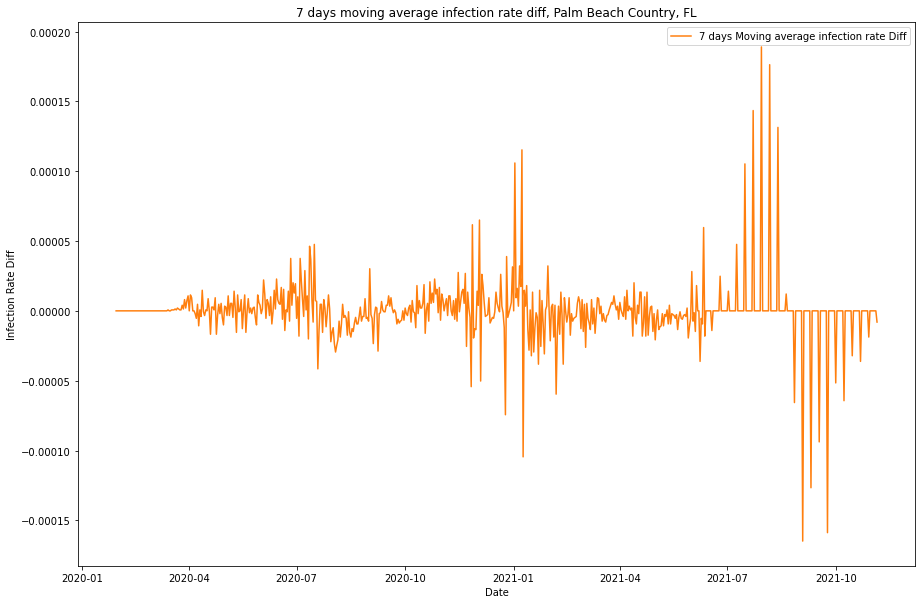

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
#ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['daily_infection_rate_diff'], color='C0')
ax.plot(df_palm_beach_confirmed_case_transformed['date'], df_palm_beach_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days_diff'], color='C1')



#line0 = lines.Line2D([0], [0], label='Daily Infection rate Diff', color='C0')
line1 = lines.Line2D([0], [0], label='7 days Moving average infection rate Diff', color='C1')

plt.legend(handles=[
    #line0,
    line1])

ax.set_title("7 days moving average infection rate diff, Palm Beach Country, FL")
ax.set_xlabel("Date")
ax.set_ylabel("Infection Rate Diff")

plt.show()

### Infection rate has no much change, specially using the 7 days moving average

## Try to find a different county and do compare?
find a similar county which has similar always waring masks, TX	Val Verde County


In [24]:
FIPS_other = 51177
df_mask_use_other = df_mask_use_by_county[df_mask_use_by_county['COUNTYFP'] == FIPS_other].reset_index(drop =True)
df_mask_use_other

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,51177,0.05,0.019,0.03,0.115,0.785


In [25]:

df_val_verde_mask_mandate = df_us_mask_mandate_dropped[df_us_mask_mandate['FIPS'] == "{:05d}".format(FIPS_other)].reset_index(drop =True)
df_val_verde_mask_mandate

,State_Tribe_Territory,County_Name,date,Face_Masks_Required_in_Public,FIPS
0,VA,Spotsylvania County,4/10/2020,NaN,51177
1,VA,Spotsylvania County,4/11/2020,NaN,51177
2,VA,Spotsylvania County,4/12/2020,NaN,51177
3,VA,Spotsylvania County,4/13/2020,NaN,51177
4,VA,Spotsylvania County,4/14/2020,NaN,51177
...,...,...,...,...,...
488,VA,Spotsylvania County,8/11/2021,No,51177
489,VA,Spotsylvania County,8/12/2021,No,51177
490,VA,Spotsylvania County,8/13/2021,No,51177
491,VA,Spotsylvania County,8/14/2021,No,51177


In [26]:
df_val_verde_mask_mandate.Face_Masks_Required_in_Public.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [27]:

df_val_verde_mask_mandate_yes = df_val_verde_mask_mandate[df_val_verde_mask_mandate['Face_Masks_Required_in_Public'] == 'Yes'].reset_index(drop =True)
df_val_verde_mask_mandate_yes

,State_Tribe_Territory,County_Name,date,Face_Masks_Required_in_Public,FIPS
0,VA,Spotsylvania County,5/29/2020,Yes,51177
1,VA,Spotsylvania County,5/30/2020,Yes,51177
2,VA,Spotsylvania County,5/31/2020,Yes,51177
3,VA,Spotsylvania County,6/1/2020,Yes,51177
4,VA,Spotsylvania County,6/2/2020,Yes,51177
...,...,...,...,...,...
346,VA,Spotsylvania County,5/10/2021,Yes,51177
347,VA,Spotsylvania County,5/11/2021,Yes,51177
348,VA,Spotsylvania County,5/12/2021,Yes,51177
349,VA,Spotsylvania County,5/13/2021,Yes,51177


In [28]:

df_val_verde_mask_mandate = df_us_mask_mandate_dropped[df_us_mask_mandate['FIPS'] == "{:05d}".format(FIPS_other)].reset_index(drop =True)
df_val_verde_mask_mandate

,State_Tribe_Territory,County_Name,date,Face_Masks_Required_in_Public,FIPS
0,VA,Spotsylvania County,4/10/2020,NaN,51177
1,VA,Spotsylvania County,4/11/2020,NaN,51177
2,VA,Spotsylvania County,4/12/2020,NaN,51177
3,VA,Spotsylvania County,4/13/2020,NaN,51177
4,VA,Spotsylvania County,4/14/2020,NaN,51177
...,...,...,...,...,...
488,VA,Spotsylvania County,8/11/2021,No,51177
489,VA,Spotsylvania County,8/12/2021,No,51177
490,VA,Spotsylvania County,8/13/2021,No,51177
491,VA,Spotsylvania County,8/14/2021,No,51177


In [29]:

df_spotsylvania_confirmed_case_transformed = df_us_confirmed_case_transformed[(df_us_confirmed_case_transformed['FIPS'] ==   "{:05d}".format(FIPS_other))].reset_index(drop=True)
df_spotsylvania_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases
0,Virginia,Spotsylvania,51177,2020-01-22,0
1,Virginia,Spotsylvania,51177,2020-01-23,0
2,Virginia,Spotsylvania,51177,2020-01-24,0
3,Virginia,Spotsylvania,51177,2020-01-25,0
4,Virginia,Spotsylvania,51177,2020-01-26,0
...,...,...,...,...,...
649,Virginia,Spotsylvania,51177,2021-11-01,15219
650,Virginia,Spotsylvania,51177,2021-11-02,15252
651,Virginia,Spotsylvania,51177,2021-11-03,15278
652,Virginia,Spotsylvania,51177,2021-11-04,15321


In [30]:
Population_other = 136215

In [31]:
df_spotsylvania_confirmed_case_transformed['new_cases'] = df_spotsylvania_confirmed_case_transformed['cases'].diff()
df_spotsylvania_confirmed_case_transformed['new_cases_moving_average_7_days'] = df_spotsylvania_confirmed_case_transformed['new_cases'].rolling(window=7).mean().round()
df_spotsylvania_confirmed_case_transformed['daily_infection_rate'] = df_spotsylvania_confirmed_case_transformed['new_cases'].apply(lambda x: x * 1.0 / Population_other)
df_spotsylvania_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days'] = df_spotsylvania_confirmed_case_transformed['new_cases_moving_average_7_days'].apply(lambda x: x * 1.0 / Population_other)
df_spotsylvania_confirmed_case_transformed['daily_infection_rate_diff'] =df_spotsylvania_confirmed_case_transformed['daily_infection_rate'].diff()
df_spotsylvania_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days_diff'] =df_spotsylvania_confirmed_case_transformed['daily_infection_rate_new_cases_moving_average_7_days'].diff()
df_spotsylvania_confirmed_case_transformed

,Province_State,Admin2,FIPS,date,cases,new_cases,new_cases_moving_average_7_days,daily_infection_rate,daily_infection_rate_new_cases_moving_average_7_days,daily_infection_rate_diff,daily_infection_rate_new_cases_moving_average_7_days_diff
0,Virginia,Spotsylvania,51177,2020-01-22,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Virginia,Spotsylvania,51177,2020-01-23,0,0.0,NaN,0.000000,NaN,NaN,NaN
2,Virginia,Spotsylvania,51177,2020-01-24,0,0.0,NaN,0.000000,NaN,0.000000,NaN
3,Virginia,Spotsylvania,51177,2020-01-25,0,0.0,NaN,0.000000,NaN,0.000000,NaN
4,Virginia,Spotsylvania,51177,2020-01-26,0,0.0,NaN,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
649,Virginia,Spotsylvania,51177,2021-11-01,15219,77.0,32.0,0.000565,0.000235,0.000565,-0.000051
650,Virginia,Spotsylvania,51177,2021-11-02,15252,33.0,33.0,0.000242,0.000242,-0.000323,0.000007
651,Virginia,Spotsylvania,51177,2021-11-03,15278,26.0,32.0,0.000191,0.000235,-0.000051,-0.000007
652,Virginia,Spotsylvania,51177,2021-11-04,15321,43.0,30.0,0.000316,0.000220,0.000125,-0.000015


In [32]:
df_palm_beach_confirmed_case_transformed.columns

Index(['Province_State', 'Admin2', 'FIPS', 'date', 'cases', 'new_cases',
       'new_cases_moving_average_7_days', 'daily_infection_rate',
       'daily_infection_rate_new_cases_moving_average_7_days',
       'daily_infection_rate_diff',
       'daily_infection_rate_new_cases_moving_average_7_days_diff'],
      dtype='object')

In [33]:

joine_df=df_palm_beach_confirmed_case_transformed.merge(df_spotsylvania_confirmed_case_transformed, left_on='date', right_on='date',
          suffixes=('_palm_beach', '_spotsylvania'))

joine_df.columns

Index(['Province_State_palm_beach', 'Admin2_palm_beach', 'FIPS_palm_beach',
       'date', 'cases_palm_beach', 'new_cases_palm_beach',
       'new_cases_moving_average_7_days_palm_beach',
       'daily_infection_rate_palm_beach',
       'daily_infection_rate_new_cases_moving_average_7_days_palm_beach',
       'daily_infection_rate_diff_palm_beach',
       'daily_infection_rate_new_cases_moving_average_7_days_diff_palm_beach',
       'Province_State_spotsylvania', 'Admin2_spotsylvania',
       'FIPS_spotsylvania', 'cases_spotsylvania', 'new_cases_spotsylvania',
       'new_cases_moving_average_7_days_spotsylvania',
       'daily_infection_rate_spotsylvania',
       'daily_infection_rate_new_cases_moving_average_7_days_spotsylvania',
       'daily_infection_rate_diff_spotsylvania',
       'daily_infection_rate_new_cases_moving_average_7_days_diff_spotsylvania'],
      dtype='object')

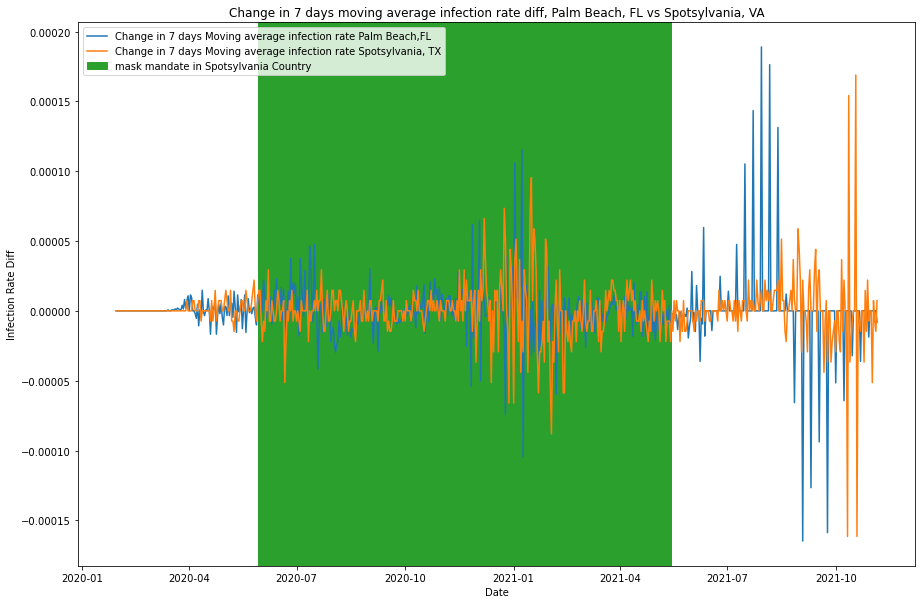

In [34]:
#

    
    
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(joine_df['date'], joine_df['daily_infection_rate_new_cases_moving_average_7_days_diff_palm_beach'], color='C0')
ax.plot(joine_df['date'], joine_df['daily_infection_rate_new_cases_moving_average_7_days_diff_spotsylvania'], color='C1')


line0 = lines.Line2D([0], [0], label='Change in 7 days Moving average infection rate Palm Beach,FL', color='C0')
line1 = lines.Line2D([0], [0], label='Change in 7 days Moving average infection rate Spotsylvania, TX', color='C1')
span = ax.axvspan(date2num(datetime(2020,5,29)), date2num(datetime(2021,5,14)),color="C2", label = 'mask mandate in Spotsylvania Country')


plt.legend(handles=[
    line0,
    line1,
span])

ax.set_title("Change in 7 days moving average infection rate diff, Palm Beach, FL vs Spotsylvania, VA")
ax.set_xlabel("Date")
ax.set_ylabel("Infection Rate Diff")

plt.show()


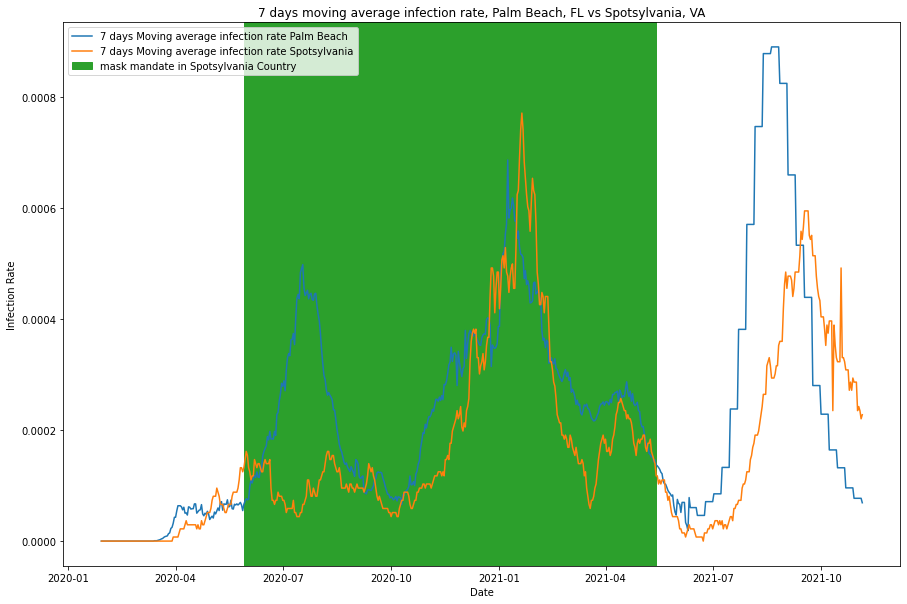

In [35]:
#

    
    
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(joine_df['date'], joine_df['daily_infection_rate_new_cases_moving_average_7_days_palm_beach'], color='C0')
ax.plot(joine_df['date'], joine_df['daily_infection_rate_new_cases_moving_average_7_days_spotsylvania'], color='C1')


line0 = lines.Line2D([0], [0], label='7 days Moving average infection rate Palm Beach', color='C0')
line1 = lines.Line2D([0], [0], label='7 days Moving average infection rate Spotsylvania', color='C1')
span = ax.axvspan(date2num(datetime(2020,5,29)), date2num(datetime(2021,5,14)),color="C2", label = 'mask mandate in Spotsylvania Country')


plt.legend(handles=[
    line0,
    line1,
span])

ax.set_title("7 days moving average infection rate, Palm Beach, FL vs Spotsylvania, VA")
ax.set_xlabel("Date")
ax.set_ylabel("Infection Rate")

plt.show()


In [36]:
# LOAD vaccinine data
df_vaccine = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')
df_vaccine


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/24/2021,12065,47,Jefferson County,FL,55.3,7882,7882.0,62.1,7609,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
1,11/24/2021,21011,47,Bath County,KY,49.1,6133,6133.0,59.0,5756,...,C,11.0,12.0,12.0,12.0,Non-metro,7.0,8.0,8.0,8.0
2,11/24/2021,28123,47,Scott County,MS,46.0,12927,12927.0,56.2,12115,...,D,15.0,16.0,16.0,16.0,Non-metro,7.0,8.0,8.0,8.0
3,11/24/2021,08013,47,Boulder County,CO,71.1,231911,231106.0,80.2,213539,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
4,11/24/2021,20199,47,Wallace County,KS,35.0,532,532.0,42.1,515,...,A,2.0,3.0,3.0,3.0,Non-metro,6.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138673,12/13/2020,16003,51,Adams County,ID,0.0,0,NaN,NaN,0,...,B,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1138674,12/13/2020,28141,51,Tishomingo County,MS,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1138675,12/13/2020,51011,51,Appomattox County,VA,0.0,0,0.0,0.0,0,...,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1138676,12/13/2020,48361,51,Orange County,TX,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


In [37]:
df_vaccine_palm_beach = df_vaccine[df_vaccine['FIPS'] == '12099'].reset_index(drop =True)
df_vaccine_palm_beach['Date'] = pd.to_datetime(df_vaccine_palm_beach['Date'])
df_vaccine_palm_beach

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-11-24,12099,47,Palm Beach County,FL,61.3,916857,916751.0,69.9,866567,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
1,2021-11-23,12099,47,Palm Beach County,FL,61.2,916257,916152.0,69.8,866037,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
2,2021-11-22,12099,47,Palm Beach County,FL,61.2,915749,915647.0,69.8,865570,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
3,2021-11-21,12099,47,Palm Beach County,FL,61.1,915151,915049.0,69.8,865021,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
4,2021-11-20,12099,46,Palm Beach County,FL,61.1,914519,914418.0,69.7,864428,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-12-17,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
343,2020-12-16,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
344,2020-12-15,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
345,2020-12-14,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


In [38]:
df_vaccine_palm_beach=df_vaccine_palm_beach.fillna(0)
df_vaccine_palm_beach

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,2021-11-24,12099,47,Palm Beach County,FL,61.3,916857,916751.0,69.9,866567,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
1,2021-11-23,12099,47,Palm Beach County,FL,61.2,916257,916152.0,69.8,866037,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
2,2021-11-22,12099,47,Palm Beach County,FL,61.2,915749,915647.0,69.8,865570,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
3,2021-11-21,12099,47,Palm Beach County,FL,61.1,915151,915049.0,69.8,865021,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
4,2021-11-20,12099,46,Palm Beach County,FL,61.1,914519,914418.0,69.7,864428,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-12-17,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0
343,2020-12-16,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0
344,2020-12-15,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0
345,2020-12-14,12099,51,Palm Beach County,FL,0.0,0,0.0,0.0,0,...,C,0.0,0.0,0.0,0.0,Metro,0.0,0.0,0.0,0.0


In [39]:
df_join_vaccine_data =df_palm_beach_confirmed_case_transformed.merge(df_vaccine_palm_beach, how="left", left_on='date', right_on='Date',
          suffixes=('', '_vaccine'))

df_join_vaccine_data=df_join_vaccine_data.fillna(0)
df_join_vaccine_data

,Province_State,Admin2,FIPS,date,cases,new_cases,new_cases_moving_average_7_days,daily_infection_rate,daily_infection_rate_new_cases_moving_average_7_days,daily_infection_rate_diff,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,Florida,Palm Beach,12099,2020-01-22,0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,Florida,Palm Beach,12099,2020-01-23,0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,Florida,Palm Beach,12099,2020-01-24,0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,Florida,Palm Beach,12099,2020-01-25,0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,Florida,Palm Beach,12099,2020-01-26,0,0.0,0.0,0.000000,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,Florida,Palm Beach,12099,2021-11-01,227675,0.0,115.0,0.000000,0.000077,0.000000,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
650,Florida,Palm Beach,12099,2021-11-02,227675,0.0,115.0,0.000000,0.000077,0.000000,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
651,Florida,Palm Beach,12099,2021-11-03,227675,0.0,115.0,0.000000,0.000077,0.000000,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0
652,Florida,Palm Beach,12099,2021-11-04,227675,0.0,115.0,0.000000,0.000077,0.000000,...,C,12.0,12.0,12.0,12.0,Metro,4.0,4.0,4.0,4.0


In [40]:
df_join_vaccine_data.columns

Index(['Province_State', 'Admin2', 'FIPS', 'date', 'cases', 'new_cases',
       'new_cases_moving_average_7_days', 'daily_infection_rate',
       'daily_infection_rate_new_cases_moving_average_7_days',
       'daily_infection_rate_diff',
       'daily_infection_rate_new_cases_moving_average_7_days_diff', 'Date',
       'FIPS_vaccine', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_Yes',
       'Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18Plus', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65Plus', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_C

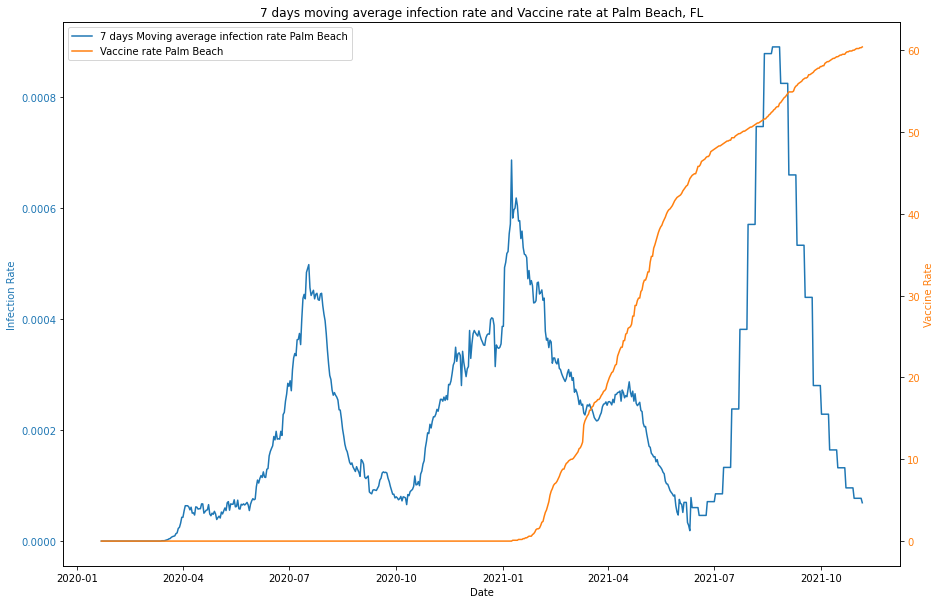

In [41]:
#

    
    
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df_join_vaccine_data['date'], df_join_vaccine_data['daily_infection_rate_new_cases_moving_average_7_days'], color='C0')
ax.set_title("7 days moving average infection rate and Vaccine rate at Palm Beach, FL")
ax.set_xlabel("Date")
ax.set_ylabel("Infection Rate", color = 'C0')
ax.tick_params(axis='y', labelcolor='C0')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_join_vaccine_data['date'], df_join_vaccine_data['Series_Complete_Pop_Pct'], color='C1')
ax2.set_ylabel("Vaccine Rate", color = 'C1')
ax2.tick_params(axis='y', labelcolor='C1')

line0 = lines.Line2D([0], [0], label='7 days Moving average infection rate Palm Beach', color='C0')
line1 = lines.Line2D([0], [0], label='Vaccine rate Palm Beach', color='C1')

plt.legend(handles=[
    line0,
    line1])


plt.show()


In [44]:
# Jul 2021: DELTA started https://www.newsweek.com/first-us-covid-delta-variant-cases-how-did-it-mutate-1617871
# second reason: Summer break



In [77]:
# check correlation before vacacine available

before_vacacine = df_join_vaccine_data.loc[(df_join_vaccine_data['date'] > '2020-1-21') & (df_join_vaccine_data['date'] < '2020-12-31')]
filterd_df_before_vacacine = before_vacacine[['daily_infection_rate_new_cases_moving_average_7_days','Series_Complete_Pop_Pct']]
filterd_df_before_vacacine


,daily_infection_rate_new_cases_moving_average_7_days,Series_Complete_Pop_Pct
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
339,0.000353,0.0
340,0.000348,0.0
341,0.000347,0.0
342,0.000349,0.0


In [78]:
correlations_before_vacacine = filterd_df_before_vacacine.corr()
correlations_before_vacacine

,daily_infection_rate_new_cases_moving_average_7_days,Series_Complete_Pop_Pct
daily_infection_rate_new_cases_moving_average_7_days,1.0,NaN
Series_Complete_Pop_Pct,NaN,NaN


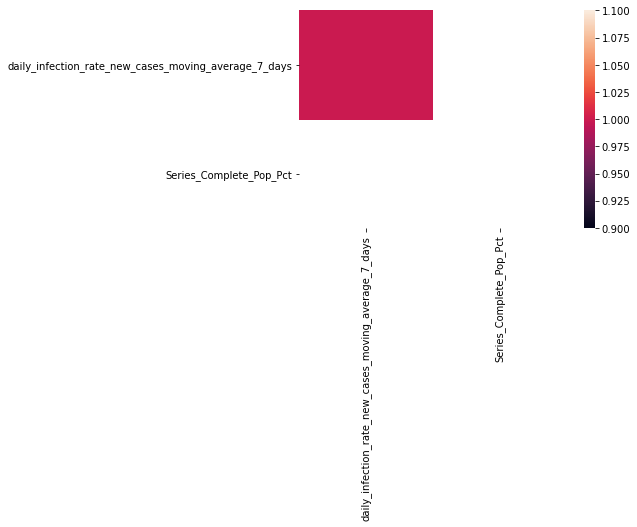

In [79]:
import seaborn as sns
sns.heatmap(correlations_before_vacacine)
plt.show()

# as expected, there is no correclation

In [84]:
# check correlation after vacacine available and before DELTA spike

after_vacacine = df_join_vaccine_data.loc[(df_join_vaccine_data['date'] > '2021-1-1') & (df_join_vaccine_data['date'] < '2021-6-30')]
filterd_df_after_vacacine = after_vacacine[['daily_infection_rate_new_cases_moving_average_7_days','Series_Complete_Pop_Pct']]
filterd_df_after_vacacine


,daily_infection_rate_new_cases_moving_average_7_days,Series_Complete_Pop_Pct
346,0.000493,0.0
347,0.000502,0.0
348,0.000518,0.0
349,0.000521,0.0
350,0.000554,0.0
...,...,...
520,0.000071,47.0
521,0.000071,47.0
522,0.000071,47.2
523,0.000071,47.6


In [85]:
correlations_after_vacacine = filterd_df_after_vacacine.corr()
correlations_after_vacacine



,daily_infection_rate_new_cases_moving_average_7_days,Series_Complete_Pop_Pct
daily_infection_rate_new_cases_moving_average_7_days,1.000000,-0.922376
Series_Complete_Pop_Pct,-0.922376,1.000000


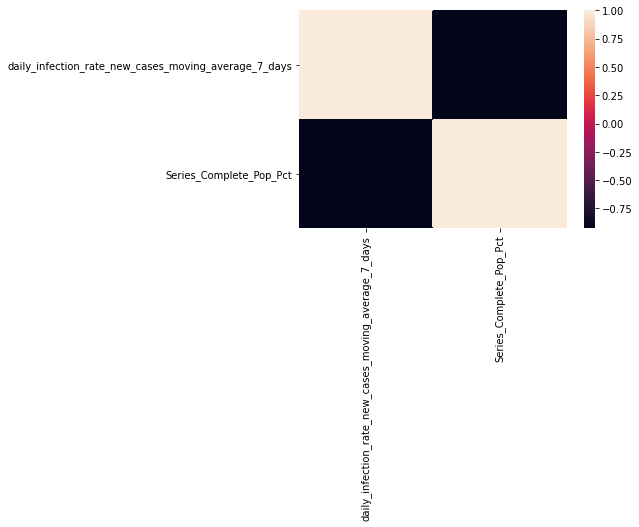

In [87]:
sns.heatmap(correlations_after_vacacine)
plt.show()

# very strong negative correlation

In [89]:
# check correlation after DELTA spike

after_spike = df_join_vaccine_data.loc[(df_join_vaccine_data['date'] > '2021-7-1') & (df_join_vaccine_data['date'] < '2022-1-1')]
filterd_df_after_spike = after_spike[['daily_infection_rate_new_cases_moving_average_7_days','Series_Complete_Pop_Pct']]
filterd_df_after_spike

,daily_infection_rate_new_cases_moving_average_7_days,Series_Complete_Pop_Pct
527,0.000085,48.0
528,0.000085,48.1
529,0.000085,48.2
530,0.000085,48.3
531,0.000085,48.3
...,...,...
649,0.000077,60.2
650,0.000077,60.2
651,0.000077,60.3
652,0.000077,60.3


In [90]:

correlations_after_spike = filterd_df_after_spike.corr()
correlations_after_spike

,daily_infection_rate_new_cases_moving_average_7_days,Series_Complete_Pop_Pct
daily_infection_rate_new_cases_moving_average_7_days,1.00000,-0.29999
Series_Complete_Pop_Pct,-0.29999,1.00000


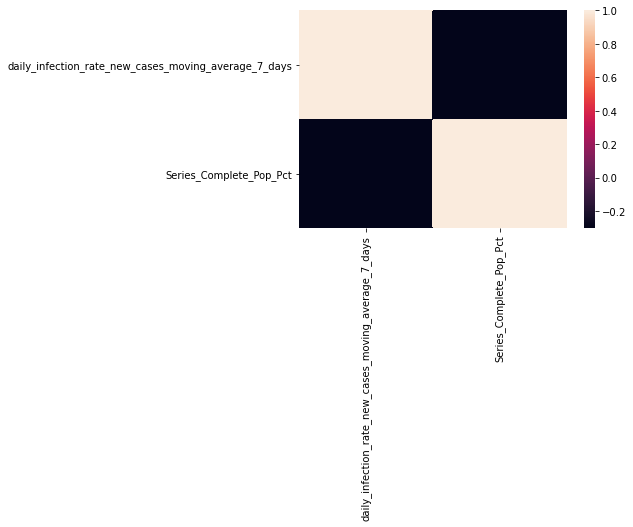

In [91]:

sns.heatmap(correlations_after_spike)
plt.show()

# slight negative correlation